<a href="https://colab.research.google.com/github/navneetslovely/QML_genom/blob/main/QNN_Z_obj_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom
!pip install qiskit-machine-learning
!pip install qiskit[visualization]
!pip install genomic-benchmarks
!pip install tensorflow>=2.6.0
!pip install tensorflow-addons
!pip install typing-extensions --upgrade
!pip install qiskit-aer

Mounted at /content/drive
/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.7 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512615 sha256=cf091e6bcac20a3e924642a4a5b14d138589b26a559d5

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
import tensorflow as tf
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from pathlib import Path
import os
import sys
import tensorflow as tf
import warnings
import numpy as np
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from genomic_benchmarks.loc2seq import download_dataset
from genomic_benchmarks.data_check import is_downloaded, info
from genomic_benchmarks.models.tf import vectorize_layer
from genomic_benchmarks.models.tf import get_basic_cnn_model_v0 as get_model
import matplotlib.pyplot as plt
import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from functools import partial
# from qiskit import Aer
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.primitives import Sampler

from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
import json
import time
import warnings
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN
from sklearn.decomposition import PCA
algorithm_globals.random_seed = 42

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import warnings
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from functools import partial
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap
from qiskit_machine_learning.circuit.library import QNNCircuit

In [3]:
# Load the preprocessed data
train_sequences = np.load('train_sequences.npy')
# print('train_sequences',train_sequences[:2])
train_labels = np.load('train_labels.npy')
# print('train_labels',train_labels[:2])
test_sequences = np.load('test_sequences.npy')
# print('test_sequences',test_sequences[:2])
test_labels = np.load('test_labels.npy')
# print('test_labels',test_labels[:2])
# Perform PCA transformation on the data
pca = PCA(n_components=4)
train_sequences = pca.fit_transform(train_sequences)
test_sequences= pca.transform(test_sequences)
train_sequences = train_sequences[:20000]
train_labels = train_labels[:20000]

# # Split the train_sequences, train_labels, test_sequences, and test_labels into 15 parts each
# split_train_sequences = np.array_split(train_sequences, 15)
# split_train_labels = np.array_split(train_labels, 15)
# split_test_sequences = np.array_split(test_sequences, 15)
# split_test_labels = np.array_split(test_labels, 15)

# # Create directories to save the parts
# os.makedirs('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/train_sequences_parts', exist_ok=True)
# os.makedirs('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/train_labels_parts', exist_ok=True)
# os.makedirs('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/test_sequences_parts', exist_ok=True)
# os.makedirs('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/test_labels_parts', exist_ok=True)

# # Save each part into a separate file
# for i in range(15):
#     np.save(f'/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/train_sequences_parts/train_seq_{i+1}.npy', split_train_sequences[i])
#     np.save(f'/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/train_labels_parts/train_labels_{i+1}.npy', split_train_labels[i])
#     np.save(f'/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/test_sequences_parts/test_seq_{i+1}.npy', split_test_sequences[i])
#     np.save(f'/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/test_labels_parts/test_labels_{i+1}.npy', split_test_labels[i])

In [4]:
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
df = pd.DataFrame({'iteration': range(len(objective_func_vals)), 'objective_function_value': objective_func_vals})
df.to_csv('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/obj_fun_val_QNN_Z.csv', index=False)

In [12]:
df_test = pd.DataFrame(objective_func_vals, columns=['Column1'])

In [13]:
print(df_test)

     Column1
0   0.498551
1   0.497974
2   0.497083
3   0.497436
4   0.496448
..       ...
95  0.486479
96  0.486602
97  0.486586
98  0.486372
99  0.486322

[100 rows x 1 columns]


In [ ]:
# prompt: how to save list into dataframe

import pandas as pd
list_data = [1, 2, 3, 4, 5]
df = pd.DataFrame(list_data, columns=['Column1'])
df.to_csv('list_data.csv', index=False)


In [5]:
feature_dim = len(train_sequences[0])
prep = ZFeatureMap(feature_dim, reps=2)
ansatz = RealAmplitudes(num_qubits=feature_dim, reps=4)

qc= QNNCircuit(num_qubits=feature_dim ,ansatz = ansatz, feature_map=prep)
# itr=0
# def training_callback(weights, obj_func_eval):
#         global itr
#         itr += 1
#         print(f"{itr} {obj_func_eval}", end=' | ')
def parity(x):
    return "{:b}".format(x).count("1") % 2
output_shape = 2

sampler_qnn = SamplerQNN(
    circuit = qc,
    interpret=parity,
    output_shape=output_shape,
    # input_gradients= True
)

sampler_classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn, optimizer=COBYLA(maxiter=100), loss= 'squared_error',callback=callback_graph
)

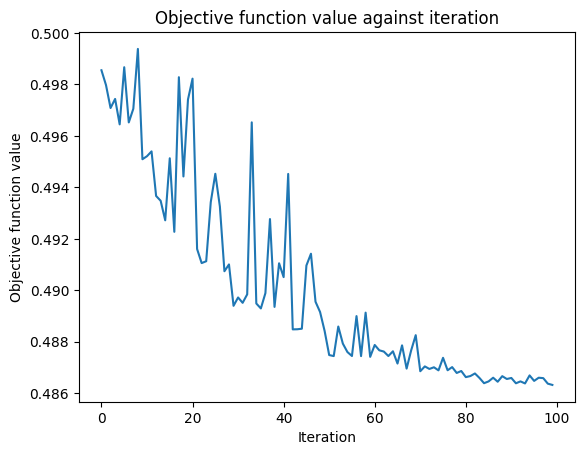

In [6]:
total_time = 0
start_time = time.time()
sampler_classifier.fit(train_sequences, train_labels)
end_time = time.time()
epoch_time = end_time - start_time
total_time += epoch_time


In [7]:
print(f"Total training time: {total_time:.2f} seconds")

Total training time: 6827.93 seconds


In [16]:

# batch_size = 5000  # Specify the batch size
# total_time = 0

# # Placeholder for saving scores
# train_scores = []
# test_scores = []

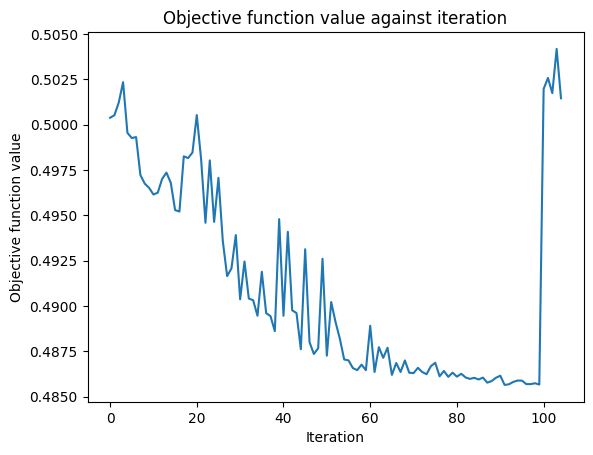

KeyboardInterrupt: 

In [17]:
# #  Specify the number of epochs
# num_epochs = 1
# for epoch in range(num_epochs):
#     start_time = time.time()  # Start time for the epoch
#     epoch_train_scores = []  # Store training scores for each epoch

#     # Loop over each data split
#     for a in range(1, 5):
#         # Load the split data
#         train_sequences_part = np.load(f'/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/train_sequences_parts/train_seq_{a}.npy')
#         train_labels_part = np.load(f'/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/QML_genom_seq/train_labels_parts/train_labels_{a}.npy')

#         print(f"Training on part {a} started")

#         # Perform training for each batch
#         for i in range(0, len(train_sequences_part), batch_size):
#             batch_sequences = train_sequences_part[i:i+batch_size]
#             batch_labels = train_labels_part[i:i+batch_size]

#             # Fit the model on the batch
#             sampler_classifier.fit(batch_sequences, batch_labels)

#             # # # Optionally evaluate on training data
#             # score = sampler_classifier.score(batch_sequences, batch_labels)
#             # epoch_train_scores.append(score)

#             print(f"Epoch {epoch + 1}, Part {a} - Batch {i // batch_size + 1} completed")

#         # # Optionally, save the model after each part is processed within an epoch
#         # sampler_classifier.save(f'model_after_part_{a}_epoch_{epoch+1}')
#         # print(f"Model saved after part {a}, epoch {epoch+1} completed")

#     # # Average training score for the epoch
#     # average_train_score = np.mean(epoch_train_scores)
#     # train_scores.append(average_train_score)

#     # Evaluate on the entire test dataset after each epoch
#     # test_score = sampler_classifier.score(test_sequences[:4000], test_labels[:4000])
#     # test_scores.append(test_score)

#     # print(f"Epoch {epoch+1} - Training Score: {average_train_score:.4f}, Test Score: {test_score:.4f}")

#     # sampler_classifier.save(f'QNN_model_ZFeatureMap_epoch_{epoch+1}')
#     # print(f"Model saved after epoch {epoch+1} completed")

#     # Calculate the time for the epoch
#     end_time = time.time()
#     epoch_time = end_time - start_time
#     total_time += epoch_time

#     print(f"Epoch {epoch+1} - Time taken: {epoch_time:.2f} seconds")

# print(f"Total training time: {total_time:.2f} seconds")

# # # Save scores to a file for later use
# # np.save('QNN_train_scores_ZZFeatureMap.npy', np.array(train_scores))
# # np.save('QNN_test_scores_ZZFeatureMap.npy', np.array(test_scores))

# # train_scores_file = 'QNN_train_scores_ZFeatureMap.npy'
# # test_scores_file = 'QNN_test_scores_ZFeatureMap.npy'

# # if os.path.exists(train_scores_file):
# #     existing_train_scores = np.load(train_scores_file)
# #     updated_train_scores = np.concatenate((existing_train_scores, train_scores))
# #     np.save(train_scores_file, updated_train_scores)
# # else:
# #     np.save(train_scores_file, np.array(train_scores))

# # if os.path.exists(test_scores_file):
# #     existing_test_scores = np.load(test_scores_file)
# #     updated_test_scores = np.concatenate((existing_test_scores, test_scores))
# #     np.save(test_scores_file, updated_test_scores)
# # else:
# #     np.save(test_scores_file, np.array(test_scores))

In [ ]:
print(f"Total training time: {total_time:.2f} seconds")

In [ ]:
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.plot(range(len(objective_func_vals)), objective_func_vals)
plt.show()

In [15]:
# prompt: how load csv file which have two column using pandas

import pandas as pd

# Read the CSV file into a Pandas DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/obj_fun_val_QNN_Z.csv')

# Print the first five rows of the DataFrame
print(df.head())


Empty DataFrame
Columns: [iteration, objective_function_value]
Index: []


In [17]:
# prompt: how to save the list in csv file

df_test.to_csv('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/obj_fun_val_QNN_Z_final.csv', index=False)


In [20]:
data = pd.read_csv('/content/drive/MyDrive/Quantum_Studies_phd/PhD/QML_Genom/obj_fun_val_QNN_Z.csv')

# Print the first five rows of the DataFrame
print(data.head())


    Column1
0  0.498551
1  0.497974
2  0.497083
3  0.497436
4  0.496448


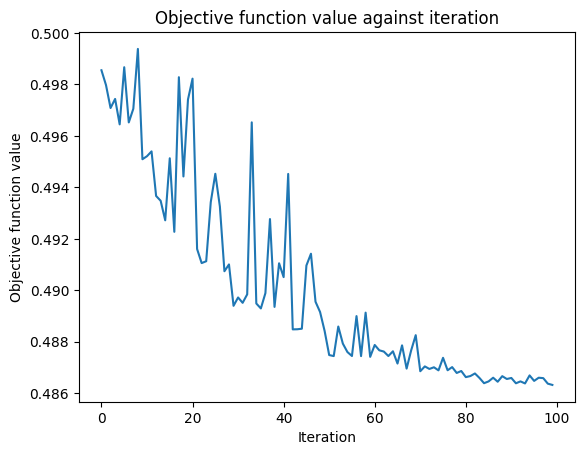

In [21]:
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.plot(range(len(data)), data)
plt.show()